In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
#%matplotlib notebook
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# About Dataset
1. User_ID:	User ID
2. Product_ID:	Product ID
3. Gender:	Sex of User
4. Age:	Age in bins
5. Occupation:	Occupation(Masked)
6. City_Category:	Category of the City (A,B,C)
7. StayInCurrentCityYears:	Number of years stay in current city
8. Marital_Status:	Marital Status
9. ProductCategory:	Product Category (Masked)
10. Purchase:	Purchase Amount

In [2]:
data = pd.read_csv('walmart_data.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Shape of Data

In [4]:
data.shape

(550068, 10)

# Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Null Check

In [6]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Relationship between Purchase made by Male User and Female Users

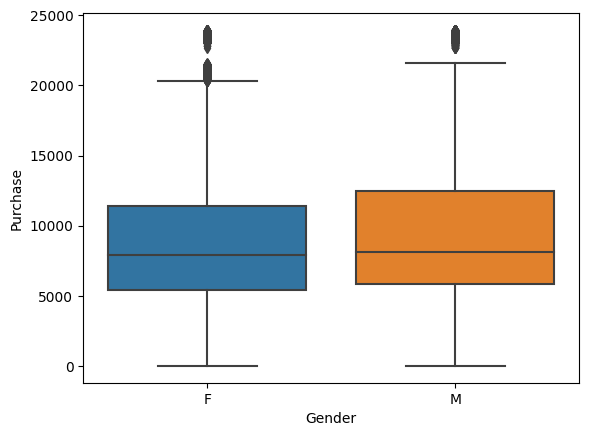

In [9]:
sns.boxplot(x='Gender',y='Purchase',data=data)
plt.show()

# Observation
1. Male users spend more than female users.
2. Average spend for male users is more than female users.

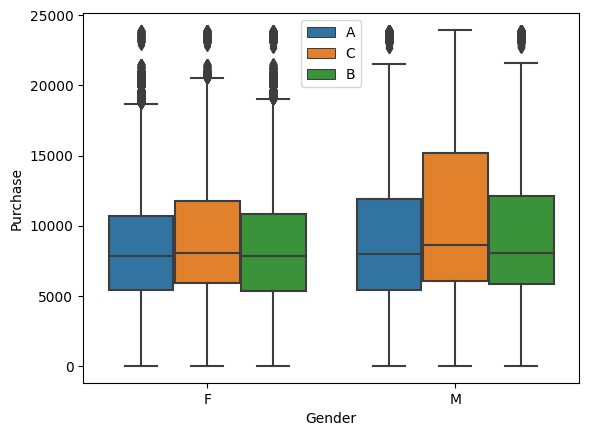

In [10]:
sns.boxplot(x='Gender',y='Purchase',data=data,hue='City_Category')
plt.legend(loc='upper center')
plt.show()

# From above observation we can see below insights for Female Users
1. Female users spends equal amount which belongs to city A and city B.
2. Female users from city C spends more than other city female users.


# From above observation we can see below insights for Male Users
1. Male user from City C spends more than city A and city B.
2. Male user from city B spends more than city A.

# Suggestion
1. Provide some discount on product to female users from city A and city B.
2. Provide some discount/good offers to male users from city A and city B.

In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


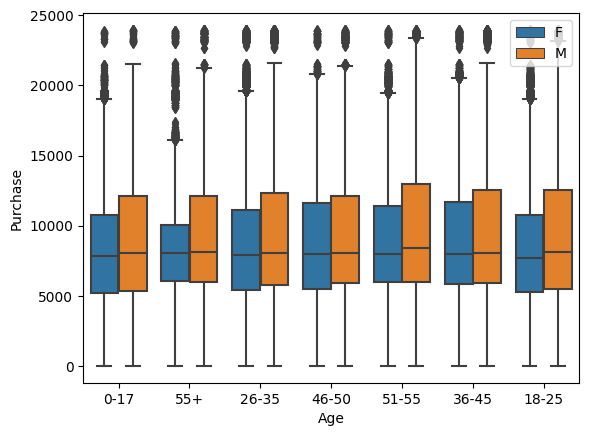

In [12]:
sns.boxplot(data=data,x='Age',y='Purchase',hue='Gender')
plt.legend(loc='upper right')
plt.show()

# Observation
1. No major difference in average purchase from users who are 55+ age group.
2. It is observed that male users from age group 51-55 has average purchase more than female users.
3. It is observed that male users from age group 18-25 has average purchase more than female users.

# Male Spending Habits

In [13]:
male_purchase_data = data.loc[data['Gender']=='M']
male_purchase_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [53]:
male_purchase_data_population_mean = round(male_purchase_data['Purchase'].mean(),2)
male_purchase_data_population_std = round(male_purchase_data['Purchase'].std(),2)
print(f"Population mean: {male_purchase_data_population_mean}")

Population mean: 9437.53


In [15]:
male_amt_spending_population = male_purchase_data['Purchase']

In [16]:
print(f'Population length : {len(male_amt_spending_population)}')

Population length : 414259


In [17]:
sample_length = 1000
population_size=414000
male_amt_spending_means = []
for sample in tqdm(range(population_size)):
    population_sample = np.random.choice(male_amt_spending_population,size=sample_length)
    population_sample_mean = round(population_sample.mean(),2)
    male_amt_spending_means.append(population_sample_mean)

100%|███████████████████████████████████████████████████████████████████████| 414000/414000 [00:36<00:00, 11235.76it/s]


In [18]:
male_amt_spending_means = np.array(male_amt_spending_means)

In [55]:
sample_mean = round(male_amt_spending_means.mean(),2)
print(f'mean_male_amt_spending : {sample_mean}')

mean_male_amt_spending : 9437.44


In [56]:
male_amt_means_twopointfifth = round(np.percentile(male_amt_spending_means,2.5),2)
male_amt_means_nintysevenpointfifth = round(np.percentile(male_amt_spending_means,97.5),2)
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

Confidence interval of male user purchase :[9123.45,9754.05]


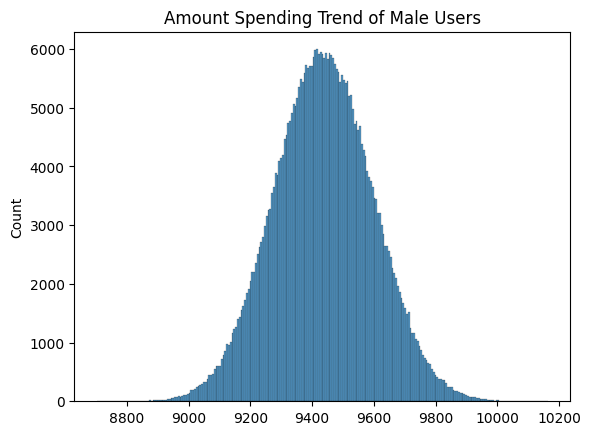

Confidence interval of male user purchase :[9123.45,9754.05]


In [57]:
plt.title('Amount Spending Trend of Male Users')
sns.histplot(male_amt_spending_means)
plt.show()
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

# Female Spending Habits

In [22]:
female_purchase_data = data.loc[data['Gender']=='F']
female_purchase_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [59]:
female_purchase_data_population_mean = round(female_purchase_data['Purchase'].mean(),2)
print(f"Population mean: {female_purchase_data_population_mean}")

Population mean: 8734.57


In [24]:
female_amt_spending_population = female_purchase_data['Purchase']

In [25]:
print(f'Population length : {len(female_amt_spending_population)}')

Population length : 135809


In [26]:
sample_length = 1000
population_size=135000
female_amt_spending_means = []
for sample in tqdm(range(population_size)):
    population_sample = np.random.choice(female_amt_spending_population,size=sample_length)
    population_sample_mean = round(population_sample.mean(),2)
    female_amt_spending_means.append(population_sample_mean)

100%|████████████████████████████████████████████████████████████████████████| 135000/135000 [00:14<00:00, 9494.30it/s]


In [27]:
female_amt_spending_means = np.array(female_amt_spending_means)

In [60]:
sample_mean = round(female_amt_spending_means.mean(),2)
print(f'mean_female_amt_spending : {sample_mean}')

mean_female_amt_spending : 8734.51


In [61]:
female_amt_means_twopointfifth = round(np.percentile(female_amt_spending_means,2.5),2)
female_amt_means_nintysevenpointfifth = round(np.percentile(female_amt_spending_means,97.5),2)
print(f'Confidence interval of female user purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

Confidence interval of female user purchase :[8440.83,9033.63]


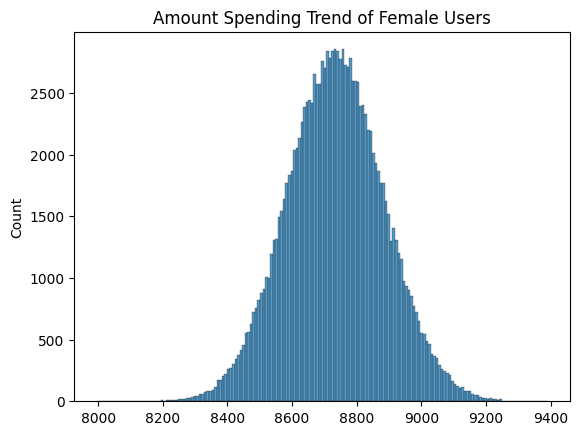

In [52]:
plt.title('Amount Spending Trend of Female Users')
sns.histplot(female_amt_spending_means)
plt.show()

# Are women spending more money per transaction than men? Why or Why not?

In [31]:
male_purchase_data_population_mean = round(male_purchase_data['Purchase'].mean(),2)
female_purchase_data_population_mean = round(female_purchase_data['Purchase'].mean(),2)
print(f"Average male spending: {male_purchase_data_population_mean}")
print(f"Average female spending: {female_purchase_data_population_mean}")

Average male spending: 9437.53
Average female spending: 8734.57


# Observation
From above calculation we can observe that average spending by male customers is higher than average spending by female customers.

# Confidence intervals and distribution of the mean of the expenses by female and male customers

# Here we are checking for 95% Confidence of purchase for Users

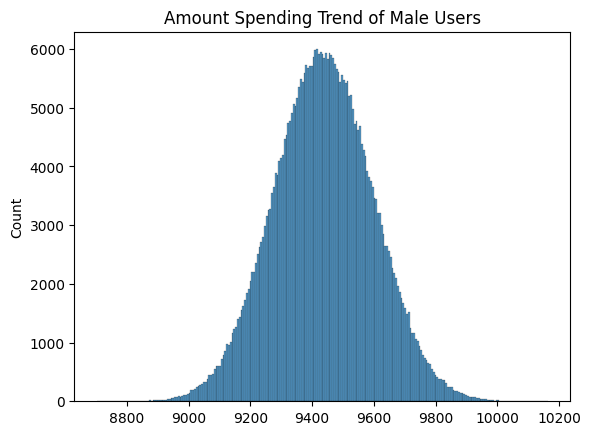

Confidence interval of male customer purchase :[9123.45,9754.05]


In [50]:
male_amt_means_twopointfifth = round(np.percentile(male_amt_spending_means,2.5),2)
male_amt_means_nintysevenpointfifth = round(np.percentile(male_amt_spending_means,97.5),2)
plt.title('Amount Spending Trend of Male Users')
sns.histplot(male_amt_spending_means)
plt.show()
print(f'Confidence interval of male customer purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

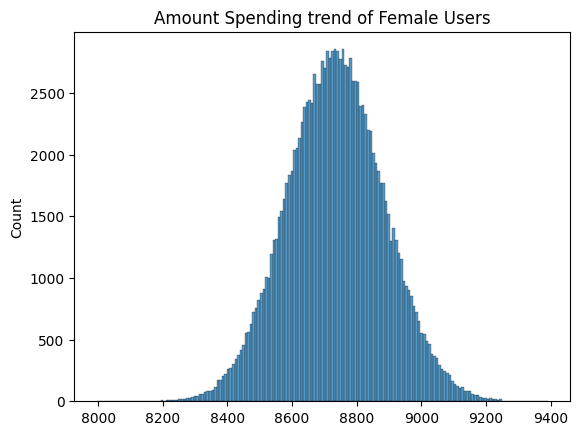

Confidence interval of female customer purchase :[8440.83,9033.63]


In [48]:
female_amt_means_twopointfifth = round(np.percentile(female_amt_spending_means,2.5),2)
female_amt_means_nintysevenpointfifth = round(np.percentile(female_amt_spending_means,97.5),2)
plt.title('Amount Spending trend of Female Users')
sns.histplot(female_amt_spending_means)
plt.show()
print(f'Confidence interval of female customer purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

# Observation
1. It is observed that male customers can spend around `minimum amount = 9122.78 and maximum amount = 9755.02` in purchase.
2. In average male customers are spending around `9264.01` amount in purchase.
3. It is observed that female customers can spend around `minimum amount = 8443.5 and maximum amount = 9030.93 `in purchase.
4. In average female customers are spending around `8734.65` amount in purchase.


# Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

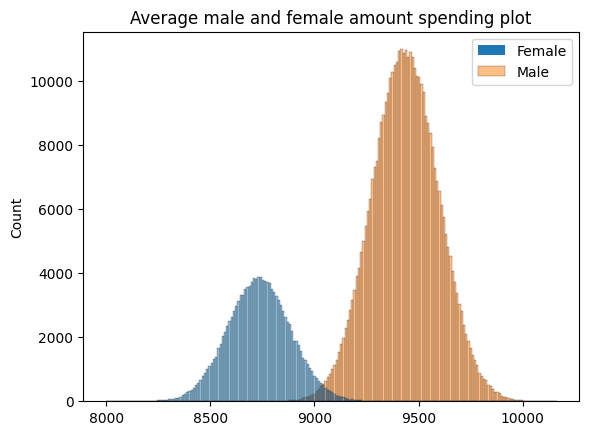

In [47]:
plt.title('Average male and female amount spending plot')
sns.histplot([female_amt_spending_means,male_amt_spending_means],legend=False)
plt.legend(['Female','Male'])
plt.show()

In [62]:
male_amt_means_twopointfifth = round(np.percentile(male_amt_spending_means,2.5),2)
male_amt_means_nintysevenpointfifth = round(np.percentile(male_amt_spending_means,97.5),2)
print(f'Confidence interval of male user purchase :[{male_amt_means_twopointfifth},{male_amt_means_nintysevenpointfifth}]')

Confidence interval of male user purchase :[9123.45,9754.05]


In [63]:
female_amt_means_twopointfifth = round(np.percentile(female_amt_spending_means,2.5),2)
female_amt_means_nintysevenpointfifth = round(np.percentile(female_amt_spending_means,97.5),2)
print(f'Confidence interval of female user purchase :[{female_amt_means_twopointfifth},{female_amt_means_nintysevenpointfifth}]')

Confidence interval of female user purchase :[8440.83,9033.63]


# Checking for common amount both the user spending in purchase

In [37]:
common_interval_amount_spend_by_both_type_of_users = np.intersect1d(male_amt_spending_means,female_amt_spending_means)

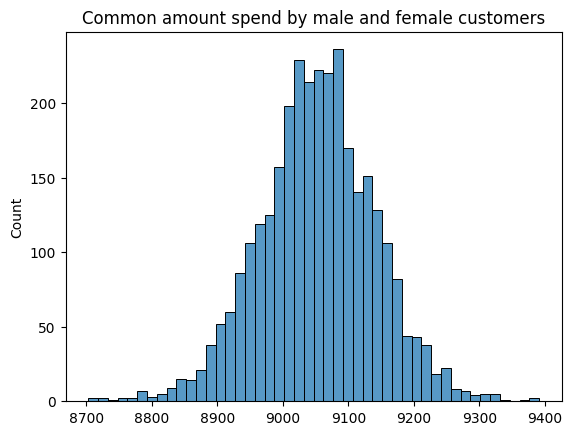

minimum amount : 8703.25, maximum amount : 9390.93


In [45]:
plt.title('Common amount spend by male and female customers')
sns.histplot(common_interval_amount_spend_by_both_type_of_users)
plt.show()
print(f'minimum amount : {min(common_interval_amount_spend_by_both_type_of_users)}, maximum amount : {max(common_interval_amount_spend_by_both_type_of_users)}')

# Observation
1. Above `Average male and female amount spending plot` depicts that although male or female customer are spending on purchase but there is a common amount set upto which both the set of users are spending.

2. This can be bring more benefits to bussiness by keeping product amount to that range it can bring more profit and it will attract more customers

3. As per `common amount spend plot` we can see both the set of customers can spend in between 8703.25 to 9390.93 amount.

In [67]:
# 90% confidence

In [68]:
female_amt_spending_means

array([8720.7 , 8740.88, 8880.23, ..., 8720.46, 8858.26, 8561.42])

In [72]:
print(f'{np.percentile(female_amt_spending_means,5)}')
print(f'{np.percentile(female_amt_spending_means,95)}')

8487.0295
8984.8305


In [69]:
male_amt_spending_means

array([9199.81, 9695.8 , 9188.6 , ..., 9709.76, 9690.43, 9501.77])

In [66]:
# Married vs Unmarried

In [65]:
# Perform same on ages